In [ ]:
"sou o dono da empresa, tenho que entender os clientes"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("./data/retail_data.csv")


In [42]:
df = data[data['is_outlier_amount']==True].head(2) 
df[['Country','Total_Purchases','Amount' ]]
data.head(2) 


,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,...,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Shipping_Method,Payment_Method,Order_Status,products,is_outlier_amount
0,Dortmund,Berlin,Germany,21.0,Male,Low,Regular,9/18/2023,2023.0,September,...,108.028757,324.086270,Clothing,Nike,Shorts,Same-Day,Debit Card,Shipped,Cycling shorts,False
1,Nottingham,England,UK,19.0,Female,Low,Premium,12/31/2023,2023.0,December,...,403.353907,806.707815,Electronics,Samsung,Tablet,Standard,Credit Card,Processing,Lenovo Tab,False


In [43]:
np.unique(data['Month'])

array(['April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'Not Informed', 'November', 'October',
       'September'], dtype=object)

In [35]:
data[['Income', 'Age']]

,Income,Age
0,Low,21.0
1,Low,19.0
2,Low,48.0
3,High,56.0
4,Low,22.0
...,...,...
302005,Medium,31.0
302006,Low,35.0
302007,Low,41.0
302008,Medium,41.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [6]:
data.isnull().sum()
#data[data.isnull().any(axis=1)]

Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64

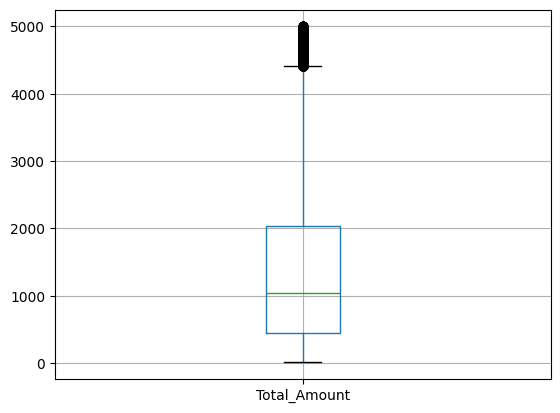

In [41]:
data.boxplot(column='Total_Amount')
plt.show()

In [52]:
data['Total_Amount'].mean()

np.float64(1367.6511556240314)

In [3]:
values = ['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address','Transaction_ID','Zipcode','Feedback','Ratings','Time','Date']
data = data.drop(columns=values)

#---------------------------------------------


In [4]:
Q1 = data['Total_Amount'].quantile(0.25)
Q3 = data['Total_Amount'].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


data['is_outlier_amount'] = (
    (data['Total_Amount'] < limite_inferior) | 
    (data['Total_Amount'] > limite_superior)
)

In [5]:
# 1. First, check how many records have ANY null value
records_with_nulls = data.isnull().any(axis=1).sum()

# 2. Handle CATEGORICAL columns
categorical_columns = ['City', 'State', 'Country', 'Gender', 'Customer_Segment', 
                       'Product_Category', 'Product_Brand', 'Shipping_Method',
                       'Payment_Method', 'Order_Status','Month','Income']

for col in categorical_columns:
    data[col] = data[col].fillna('Not Informed')
    
# columns NUMÉRICS
numerical_columns = ['Age', 'Amount', 'Total_Amount', 'Year','Total_Purchases']

for col in numerical_columns:
    if col in data.columns:                               
        if pd.api.types.is_numeric_dtype(data[col]):
            median_value = data[col].median()
            data[col] = data[col].fillna(median_value)            
        else:    
            data[col] = data[col].fillna('Not Informed')


In [6]:
data.isnull().sum()
#data[data.isnull().any(axis=1)]

City                 0
State                0
Country              0
Age                  0
Gender               0
Income               0
Customer_Segment     0
Year                 0
Month                0
Total_Purchases      0
Amount               0
Total_Amount         0
Product_Category     0
Product_Brand        0
Product_Type         0
Shipping_Method      0
Payment_Method       0
Order_Status         0
products             0
is_outlier_amount    0
dtype: int64